In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [69]:
# Load and combine all the data
all_dfs = glob('./output/*.csv')
all_loaded = pd.concat([pd.read_csv(x, index_col=0) for x in all_dfs])
all_loaded = all_loaded.sort_values(['year', 'tourney_order', 'round_number', 'match'])

In [70]:
# Fields should hopefully mostly be self-explanatory.
# round_number assigns a number to each round, from 1 (first) to 7 (final)
# tourney_order is there to order the tournaments within the year, with 1 = AO and 4 = USO (hopefully this holds)
# throughout time.
all_loaded.head()

,match,year,round,round_number,games_loser,games_winner,loser,sets_loser,sets_winner,surface,winner,tourney_name,tourney_order
1,1,1877,first round,1,5.0,18.0,Henry T Gillson,0.0,3.0,grass,Spencer Gore,wimbledon,3
875,2,1877,first round,1,14.0,21.0,Robert Dalby,1.0,3.0,grass,Montague Hankey,wimbledon,3
1606,3,1877,first round,1,5.0,18.0,John William Trist,0.0,3.0,grass,John Baker,wimbledon,3
2813,5,1877,first round,1,9.0,18.0,H Wheeler,0.0,3.0,grass,Lestocq Robert Erskine,wimbledon,3
3284,6,1877,first round,1,11.0,18.0,Henry Soden,0.0,3.0,grass,J Lambert,wimbledon,3


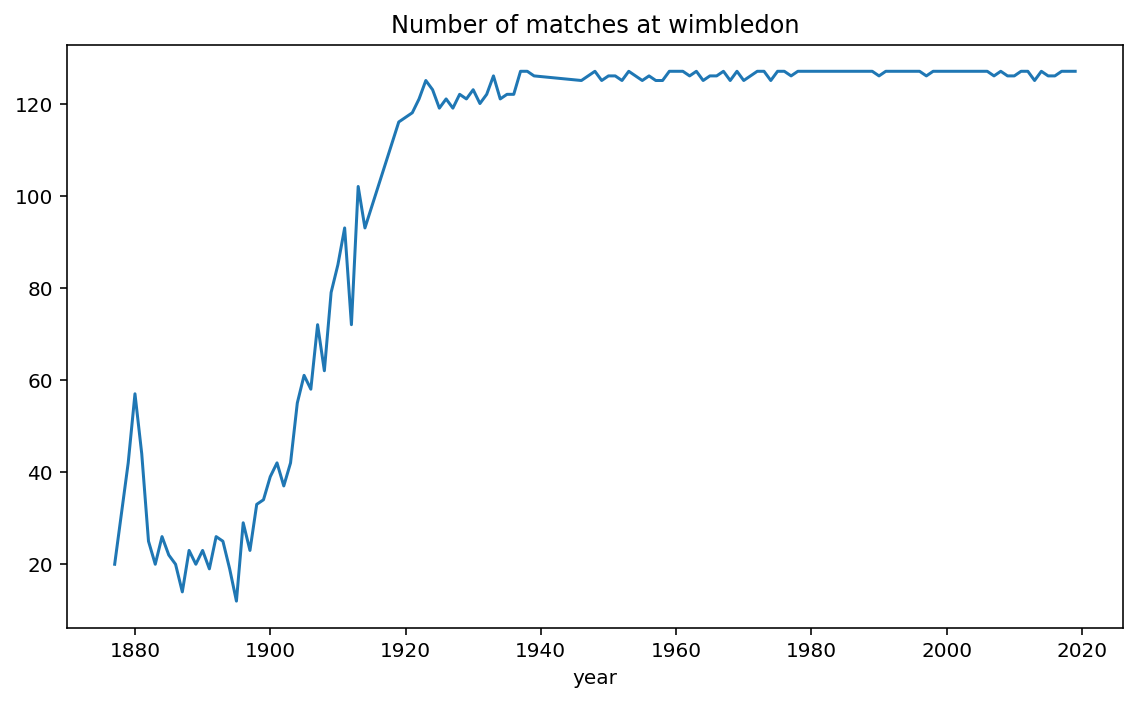

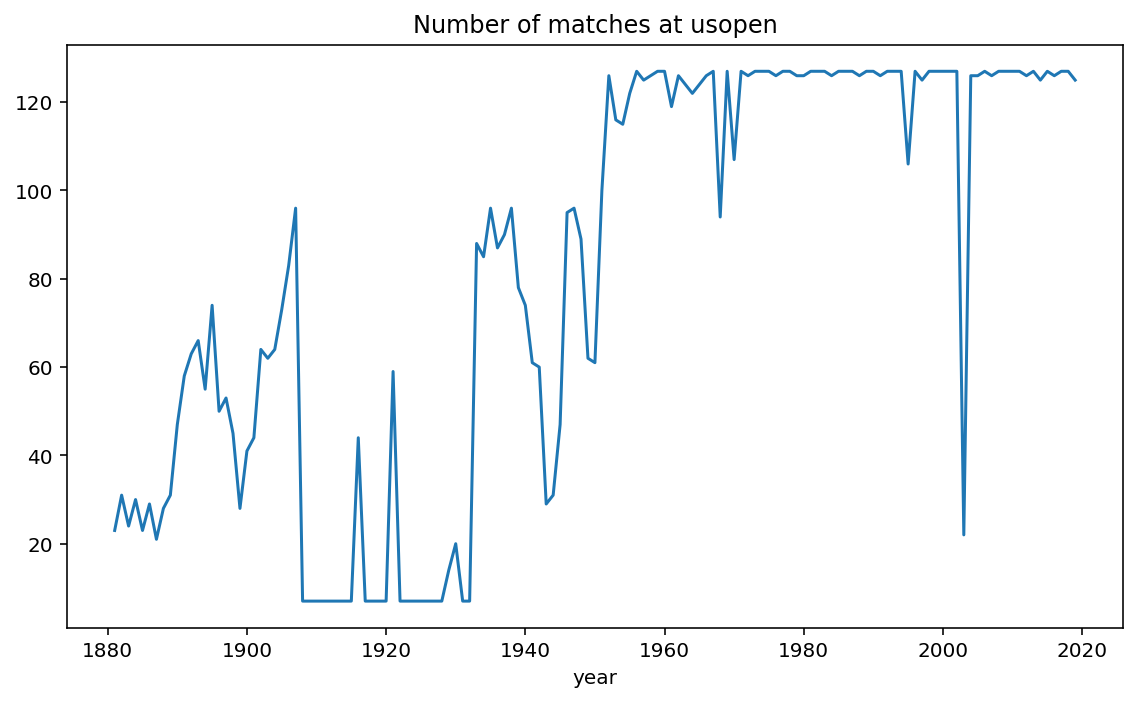

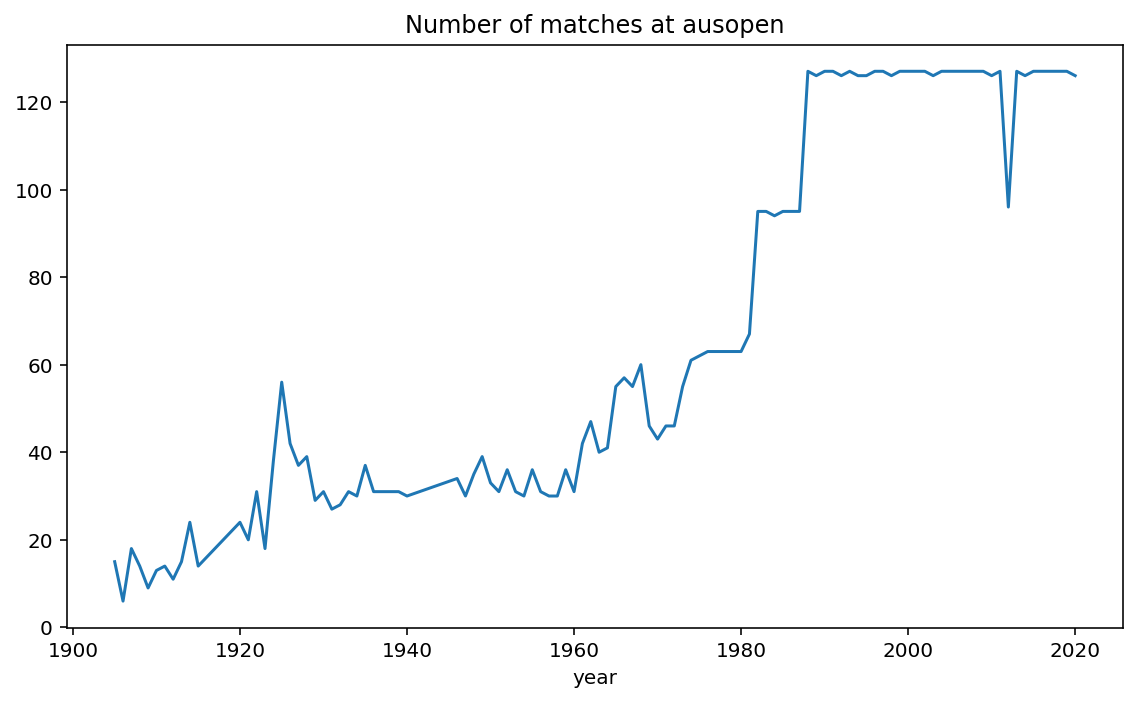

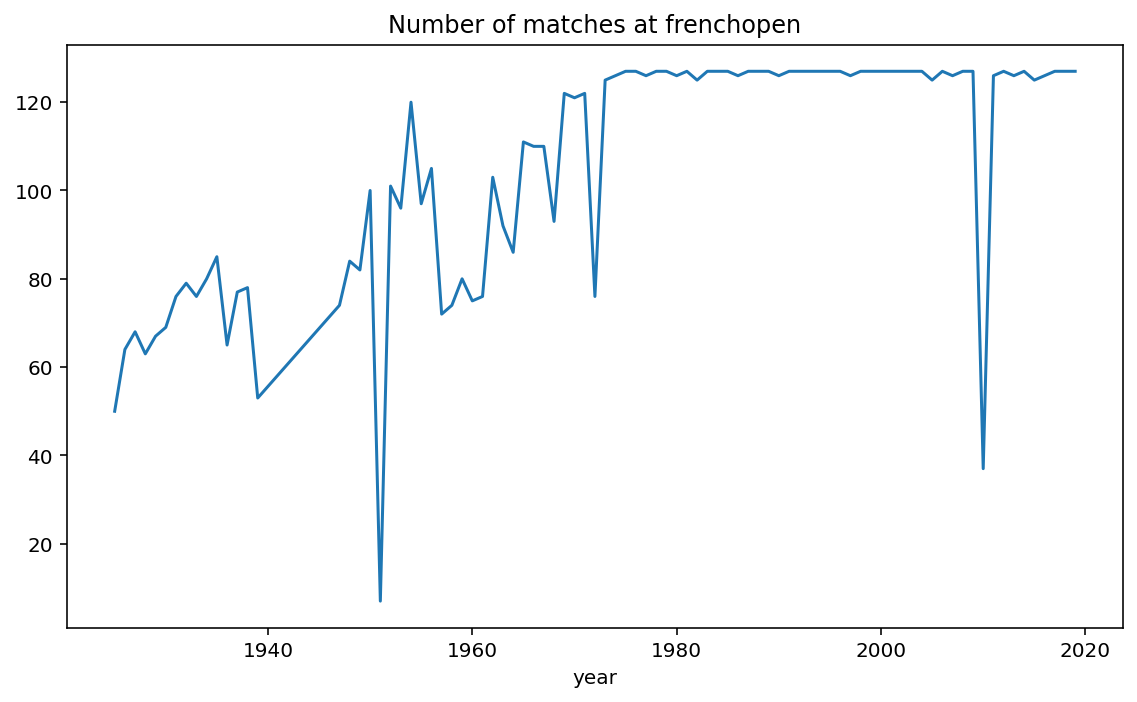

In [66]:
for cur_tourney in all_loaded['tourney_name'].unique():
    f, ax = plt.subplots(1, 1)
    all_loaded[all_loaded['tourney_name'] == cur_tourney].groupby('year').apply(lambda x: x.shape[0]).plot(ax=ax)
    ax.set_title(f'Number of matches at {cur_tourney}')
    f.set_size_inches(8, 5)
    f.tight_layout()